# Stockloss Model - Tag free as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("BaseforRegressionModel-IncludingTagFree.csv")

In [3]:
df.head()

,STORE_NUMBER,STORE_NAME,MARKET,REGION,TERRITORY,NUMBER_OF_FLOORS,SHOP_FLOOR_SIZE_SQ_METRES,REFIT_GRADE,LIKE_FOR_LIKENESS,NUMBER_OF_DELIVERIES_PER_WEEK,...,Cost_loss_tot,Sales_value_fp,Sales_value_md,Sales_value_tot,Loss_pc_fp,Loss_pc_md,Loss_pc_tot,line_void_pc,trans_void_pc,tag_status
0,2,MARBLE ARCH PARK HOUSE,London,LONDON,South,3,329.0,FS1,LFL,5,...,-56850.22,-6019109.61,-817232.46,6836342.07,0.010108,-0.004881,0.008316,0.045110,0.110992,Large_del_wk45
1,3,CROYDON,London,LONDON,South,2,205.0,4,LFL,2,...,-92561.83,-2135934.47,-435750.06,2571684.53,0.036096,0.035487,0.035993,0.064102,0.119438,Tagged
2,6,BIRKENHEAD,North West,NORTH WEST,North,1,230.5,3,LFL,2,...,-9129.23,-1184057.15,-294247.86,1478305.01,0.009318,-0.006472,0.006175,0.035990,0.075718,Tagged
3,8,BRIGHTON,South East,SOUTH EAST ENGLAND,South,2,195.0,4,LFL,2,...,-22215.70,-1934794.07,-351436.23,2286230.30,0.013380,-0.010445,0.009717,0.045966,0.091024,Tagged
4,9,BOURNEMOUTH,South West,SOUTH WEST ENGLAND,South,2,161.0,4,LFL,2,...,-34902.78,-1708997.46,-321195.44,2030192.90,0.017427,0.015938,0.017192,0.028590,0.058548,Tagged


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STORE_NUMBER                      243 non-null    int64  
 1   STORE_NAME                        243 non-null    object 
 2   MARKET                            243 non-null    object 
 3   REGION                            243 non-null    object 
 4   TERRITORY                         243 non-null    object 
 5   NUMBER_OF_FLOORS                  243 non-null    int64  
 6   SHOP_FLOOR_SIZE_SQ_METRES         243 non-null    float64
 7   REFIT_GRADE                       243 non-null    object 
 8   LIKE_FOR_LIKENESS                 243 non-null    object 
 9   NUMBER_OF_DELIVERIES_PER_WEEK     243 non-null    int64  
 10  STORE_TYPE                        243 non-null    object 
 11  STORE_SIZE                        243 non-null    object 
 12  STORE_LA

## Data preparation

In [5]:
df[['MARKET','STORE_NUMBER']].groupby(['MARKET']).count()

,STORE_NUMBER
MARKET,
East,20
London,18
Midlands,16
North Central,18
North East,18
North West,16
Northern Ireland,18
Republic Of Ireland,19
Scotland,24


In [6]:
df = pd.get_dummies(df, columns=['MARKET'],drop_first = False)

In [7]:
df.head()

,STORE_NUMBER,STORE_NAME,REGION,TERRITORY,NUMBER_OF_FLOORS,SHOP_FLOOR_SIZE_SQ_METRES,REFIT_GRADE,LIKE_FOR_LIKENESS,NUMBER_OF_DELIVERIES_PER_WEEK,STORE_TYPE,...,MARKET_North Central,MARKET_North East,MARKET_North West,MARKET_Northern Ireland,MARKET_Republic Of Ireland,MARKET_Scotland,MARKET_South East,MARKET_South West,MARKET_Wales & Gloucs,MARKET_Yorkshire
0,2,MARBLE ARCH PARK HOUSE,LONDON,South,3,329.0,FS1,LFL,5,High Street,...,0,0,0,0,0,0,0,0,0,0
1,3,CROYDON,LONDON,South,2,205.0,4,LFL,2,Town Shpg Ctr,...,0,0,0,0,0,0,0,0,0,0
2,6,BIRKENHEAD,NORTH WEST,North,1,230.5,3,LFL,2,Town Shpg Ctr,...,0,0,1,0,0,0,0,0,0,0
3,8,BRIGHTON,SOUTH EAST ENGLAND,South,2,195.0,4,LFL,2,City Shpg Ctr,...,0,0,0,0,0,0,1,0,0,0
4,9,BOURNEMOUTH,SOUTH WEST ENGLAND,South,2,161.0,4,LFL,2,High Street,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STORE_NUMBER                      243 non-null    int64  
 1   STORE_NAME                        243 non-null    object 
 2   REGION                            243 non-null    object 
 3   TERRITORY                         243 non-null    object 
 4   NUMBER_OF_FLOORS                  243 non-null    int64  
 5   SHOP_FLOOR_SIZE_SQ_METRES         243 non-null    float64
 6   REFIT_GRADE                       243 non-null    object 
 7   LIKE_FOR_LIKENESS                 243 non-null    object 
 8   NUMBER_OF_DELIVERIES_PER_WEEK     243 non-null    int64  
 9   STORE_TYPE                        243 non-null    object 
 10  STORE_SIZE                        243 non-null    object 
 11  STORE_LAYOUT                      239 non-null    object 
 12  SEASIDE_

In [9]:
df['STORE_SIZE'].unique()

array(['FLAG', 'MID', 'STANDARD', 'LARGE', 'SMALL', 'X SMALL', 'MEGA'],
      dtype=object)

In [10]:
df=pd.get_dummies(df, columns = ['REGION','TERRITORY','NUMBER_OF_FLOORS','REFIT_GRADE','LIKE_FOR_LIKENESS',
'STORE_TYPE','STORE_SIZE','STORE_LAYOUT','SEASIDE_FLAG','UNI_FLAG','KW_GRADE','MW_GRADE'],drop_first = False)

In [11]:
df.columns[df.columns.str.contains(pat = 'NUMBER_OF_FLOORS')]

Index(['NUMBER_OF_FLOORS_1', 'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3'], dtype='object')

In [12]:
df=pd.get_dummies(df, columns = ['tag_status'],drop_first = False)

In [13]:
df.columns[df.columns.str.contains(pat = 'tag_status')]

Index(['tag_status_Del_wk40', 'tag_status_Large_del_wk45',
       'tag_status_No_tags', 'tag_status_Tagged'],
      dtype='object')

## DATA INVESTIGATION

In [14]:
df.columns[df.columns.str.contains(pat = 'TERRITORY')]

Index(['TERRITORY_Midland', 'TERRITORY_North', 'TERRITORY_Scotland & Ireland',
       'TERRITORY_South'],
      dtype='object')

In [15]:
corr_terr=df[['TERRITORY_Midland', 'TERRITORY_North', 'TERRITORY_Scotland & Ireland',
       'TERRITORY_South','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_terr[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
TERRITORY_South,0.220136,-0.226723,0.397178,0.370324
TERRITORY_Midland,0.022834,-0.029705,0.078910,0.060260
TERRITORY_North,0.002313,-0.002055,-0.072349,-0.044868
TERRITORY_Scotland & Ireland,-0.240450,0.253153,-0.388913,-0.373814
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [16]:
df.columns[df.columns.str.contains(pat = 'REGION')]

Index(['REGION_EAST MIDLANDS', 'REGION_EAST OF ENGLAND', 'REGION_IRELAND',
       'REGION_LONDON', 'REGION_NORTH EAST', 'REGION_NORTH WEST',
       'REGION_NORTHERN IRELAND', 'REGION_SCOTLAND',
       'REGION_SOUTH EAST ENGLAND', 'REGION_SOUTH WEST ENGLAND',
       'REGION_WALES', 'REGION_WEST MIDLANDS', 'REGION_YORKSHIRE & THE HUMBER',
       'REGION_YORKSHIRE AND THE HUMBER'],
      dtype='object')

In [17]:
corr_market=df[['REGION_EAST MIDLANDS',
       'REGION_EAST OF ENGLAND', 'REGION_IRELAND', 'REGION_LONDON',
       'REGION_NORTH EAST', 'REGION_NORTH WEST', 'REGION_NORTHERN IRELAND',
       'REGION_SCOTLAND', 'REGION_SOUTH EAST ENGLAND',
       'REGION_SOUTH WEST ENGLAND', 'REGION_WALES', 'REGION_WEST MIDLANDS',
       'REGION_YORKSHIRE & THE HUMBER', 'REGION_YORKSHIRE AND THE HUMBER','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_market[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
REGION_LONDON,0.290026,-0.312821,0.231276,0.249204
REGION_WEST MIDLANDS,0.074244,-0.086201,0.054621,0.042582
REGION_NORTH WEST,0.069917,-0.080788,0.058808,0.085437
REGION_SOUTH EAST ENGLAND,0.061611,-0.064544,0.312388,0.276686
REGION_YORKSHIRE & THE HUMBER,0.051453,-0.034228,-0.007089,-0.013642
REGION_EAST MIDLANDS,0.031197,-0.033320,0.062091,0.052364
REGION_EAST OF ENGLAND,0.023407,-0.030853,0.058516,0.079045


In [18]:
df.columns[df.columns.str.contains(pat = 'NUMBER_OF_FLOORS')]

Index(['NUMBER_OF_FLOORS_1', 'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3'], dtype='object')

In [19]:
corr_floors=df[['NUMBER_OF_FLOORS_1', 'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_floors[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
NUMBER_OF_FLOORS_3,0.298641,-0.245266,0.045468,0.012745
NUMBER_OF_FLOORS_2,0.074880,-0.095858,0.026664,0.061093
NUMBER_OF_FLOORS_1,-0.185388,0.187727,-0.043982,-0.067683
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [20]:
df.columns[df.columns.str.contains(pat = 'SHOP_FLOOR_SIZE_SQ_METRES')]

Index(['SHOP_FLOOR_SIZE_SQ_METRES'], dtype='object')

In [21]:
corr_size=df[['SHOP_FLOOR_SIZE_SQ_METRES', 'Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_size[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
SHOP_FLOOR_SIZE_SQ_METRES,0.252345,-0.254930,-0.083631,-0.061432
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [22]:
df.columns[df.columns.str.contains(pat = 'REFIT_GRADE')]

Index(['REFIT_GRADE_0', 'REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
       'REFIT_GRADE_2', 'REFIT_GRADE_3', 'REFIT_GRADE_4', 'REFIT_GRADE_5',
       'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_8', 'REFIT_GRADE_FS1',
       'REFIT_GRADE_FS2', 'REFIT_GRADE_FS3'],
      dtype='object')

In [23]:
corr_refit=df[['REFIT_GRADE_0', 'REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
       'REFIT_GRADE_2', 'REFIT_GRADE_3', 'REFIT_GRADE_4', 'REFIT_GRADE_5',
       'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_8', 'REFIT_GRADE_FS1',
       'REFIT_GRADE_FS2', 'Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_refit[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
REFIT_GRADE_FS1,0.472495,-0.435209,0.051967,0.035956
REFIT_GRADE_FS2,0.330573,-0.287728,-0.004977,-0.014991
REFIT_GRADE_6,0.222063,-0.230872,-0.056397,-0.045489
REFIT_GRADE_11,0.134807,-0.120262,0.085684,0.062681
REFIT_GRADE_10,0.105559,-0.099321,0.049400,0.040052
REFIT_GRADE_7,0.077232,-0.062032,0.049145,0.030487
REFIT_GRADE_5,0.062573,-0.073729,-0.052468,-0.033973


In [24]:
df.columns[df.columns.str.contains(pat = 'LIKE_FOR_LIKENESS')]

Index(['LIKE_FOR_LIKENESS_LFL', 'LIKE_FOR_LIKENESS_NEW',
       'LIKE_FOR_LIKENESS_REFIT', 'LIKE_FOR_LIKENESS_RESITE'],
      dtype='object')

In [25]:
corr_lfl=df[['LIKE_FOR_LIKENESS_LFL', 'LIKE_FOR_LIKENESS_NEW',
       'LIKE_FOR_LIKENESS_REFIT', 'LIKE_FOR_LIKENESS_RESITE','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_lfl[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
LIKE_FOR_LIKENESS_LFL,0.057030,-0.072170,0.069068,0.083705
LIKE_FOR_LIKENESS_RESITE,0.003885,-0.000431,-0.002249,-0.007298
LIKE_FOR_LIKENESS_NEW,-0.040892,0.055751,-0.032352,-0.050106
LIKE_FOR_LIKENESS_REFIT,-0.059817,0.064304,-0.095107,-0.091893
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [26]:
df.columns[df.columns.str.contains(pat = 'STORE_TYPE')]

Index(['STORE_TYPE_City Shpg Ctr', 'STORE_TYPE_High Street',
       'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
       'STORE_TYPE_Town Shpg Ctr'],
      dtype='object')

In [27]:
corr_type=df[['STORE_TYPE_City Shpg Ctr', 'STORE_TYPE_High Street',
       'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
       'STORE_TYPE_Town Shpg Ctr','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_type[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
STORE_TYPE_Rgnl Shpg Ctr,0.462912,-0.438184,-0.005355,-0.006419
STORE_TYPE_City Shpg Ctr,0.127717,-0.129604,-0.003753,0.011265
STORE_TYPE_Retail Park,-0.053009,0.040175,0.025530,0.042910
STORE_TYPE_High Street,-0.150235,0.146338,-0.068920,-0.059570
STORE_TYPE_Town Shpg Ctr,-0.150621,0.154029,0.051644,0.015887
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [28]:
df.columns[df.columns.str.contains(pat = 'STORE_SIZE')]

Index(['STORE_SIZE_FLAG', 'STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
       'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
       'STORE_SIZE_X SMALL'],
      dtype='object')

In [29]:
corr_size=df[['STORE_SIZE_FLAG', 'STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
       'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
       'STORE_SIZE_X SMALL','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_size[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
STORE_SIZE_MEGA,0.627140,-0.577335,0.077952,0.060472
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
STORE_SIZE_FLAG,0.298752,-0.254078,-0.014421,-0.029120
STORE_SIZE_LARGE,0.268272,-0.283588,0.022189,0.024937
STORE_SIZE_MID,0.047373,-0.036122,-0.035811,-0.049836
STORE_SIZE_STANDARD,-0.073116,0.043557,0.090346,0.123476
STORE_SIZE_X SMALL,-0.257085,0.266074,-0.035741,-0.078985
STORE_SIZE_SMALL,-0.265311,0.251693,-0.066286,-0.042097


In [30]:
df.columns[df.columns.str.contains(pat = 'STORE_LAYOUT')]

Index(['STORE_LAYOUT_Basement Menswear', 'STORE_LAYOUT_First Floor Menswear',
       'STORE_LAYOUT_Lower Menswear Own Entrance',
       'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
       'STORE_LAYOUT_Upper Menswear Own Entrance',
       'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only'],
      dtype='object')

In [31]:
corr_layout=df[['STORE_LAYOUT_Basement Menswear', 'STORE_LAYOUT_First Floor Menswear',
       'STORE_LAYOUT_Lower Menswear Own Entrance',
       'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
       'STORE_LAYOUT_Upper Menswear Own Entrance',
       'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_layout[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
STORE_LAYOUT_Lower Menswear Own Entrance,0.307021,-0.301442,0.175575,0.163502
STORE_LAYOUT_First Floor Menswear,0.105487,-0.106442,0.098573,0.101472
STORE_LAYOUT_Basement Menswear,0.039583,-0.012465,-0.068651,-0.083287
STORE_LAYOUT_Womenswear Only,0.022054,-0.003573,-0.044400,-0.063856
STORE_LAYOUT_Upper Menswear Own Entrance,-0.018343,0.011758,-0.019176,0.004931
STORE_LAYOUT_Womenswear Non Cloth,-0.044596,0.043335,-0.044785,-0.037039
STORE_LAYOUT_Side by Side,-0.097672,0.089239,-0.115870,-0.100784


In [32]:
df.columns[df.columns.str.contains(pat = 'SEASIDE_FLAG')]

Index(['SEASIDE_FLAG_N', 'SEASIDE_FLAG_Y'], dtype='object')

In [33]:
corr_sea=df[['SEASIDE_FLAG_Y','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_sea[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
SEASIDE_FLAG_Y,-0.112597,0.125831,-0.054879,-0.067738
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [34]:
df.columns[df.columns.str.contains(pat = 'UNI_FLAG')]

Index(['UNI_FLAG_N', 'UNI_FLAG_Y'], dtype='object')

In [35]:
corr_uni=df[['UNI_FLAG_Y','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_uni[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
UNI_FLAG_Y,0.233725,-0.231245,0.159746,0.157843
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [36]:
df.columns[df.columns.str.contains(pat = 'KW_GRADE')]

Index(['KW_GRADE_0', 'KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
       'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
       'KW_GRADE_BO', 'KW_GRADE_MO'],
      dtype='object')

In [37]:
corr_kw=df[['KW_GRADE_0', 'KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
       'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
       'KW_GRADE_BO', 'KW_GRADE_MO','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_kw[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
KW_GRADE_1,0.257552,-0.252724,-0.038384,-0.035307
KW_GRADE_3,0.240495,-0.241315,0.027656,0.031687
KW_GRADE_2,0.230822,-0.206535,-0.016694,-0.027503
KW_GRADE_4,0.142007,-0.140001,0.143827,0.117018
KW_GRADE_5,-0.006598,0.020659,-0.008143,-0.023600
KW_GRADE_6,-0.021095,0.033197,0.026125,0.003472
KW_GRADE_0,-0.055748,0.057105,0.122864,0.071582


In [38]:
df.columns[df.columns.str.contains(pat = 'MW_GRADE')]

Index(['MW_GRADE_1.0', 'MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
       'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
       'MW_GRADE_9.0'],
      dtype='object')

In [39]:
corr_mw=df[['MW_GRADE_1.0', 'MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
       'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
       'MW_GRADE_9.0','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_mw[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
MW_GRADE_3.0,0.400747,-0.397341,0.047024,0.046100
MW_GRADE_4.0,0.383131,-0.356622,0.081590,0.057154
MW_GRADE_1.0,0.288729,-0.266371,0.023487,0.013010
MW_GRADE_2.0,0.280672,-0.232081,-0.024322,-0.033809
MW_GRADE_5.0,0.064757,-0.080629,0.105153,0.099203
MW_GRADE_6.0,-0.057601,0.028166,0.016195,0.066918
MW_GRADE_9.0,-0.179207,0.177300,-0.052755,-0.064571


In [40]:
df.columns[df.columns.str.contains(pat = 'NO.INCIDENTS - PHYSICAL VIOLENCE')]

Index(['NO.INCIDENTS - PHYSICAL VIOLENCE'], dtype='object')

In [41]:
corr_vio=df[['NO.INCIDENTS - PHYSICAL VIOLENCE','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_vio[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
NO.INCIDENTS - PHYSICAL VIOLENCE,0.412209,-0.394968,0.206615,0.178646
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [42]:
corr_voids=df[['No.Voids','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_voids[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
No.Voids,0.788379,-0.741312,0.121710,0.095474
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [43]:
 corr_unemp=df[['Unemployment','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_unemp[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
Unemployment,0.483261,-0.491212,0.248417,0.247563
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [44]:
 corr_lvoid=df[['line_void_pc', 'trans_void_pc','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_lvoid[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
trans_void_pc,0.212465,-0.208208,0.420793,0.334842
line_void_pc,0.162131,-0.154757,0.397476,0.308664
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [45]:
df.columns[df.columns.str.contains(pat = 'tag_status')]

Index(['tag_status_Del_wk40', 'tag_status_Large_del_wk45',
       'tag_status_No_tags', 'tag_status_Tagged'],
      dtype='object')

In [46]:
 corr_tag=df[['tag_status_Del_wk40', 'tag_status_Large_del_wk45',
       'tag_status_No_tags', 'tag_status_Tagged','Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].corr()
# Now just select the returns rate correlations - the only ones we're interested in... (and rank them)
corr_tag[['Cost_loss_fp','Cost_loss_tot','Loss_pc_fp',
        'Loss_pc_tot']].sort_values(by = 'Cost_loss_fp',ascending=False)

,Cost_loss_fp,Cost_loss_tot,Loss_pc_fp,Loss_pc_tot
Cost_loss_fp,1.000000,-0.971147,0.548570,0.499669
Loss_pc_fp,0.548570,-0.571046,1.000000,0.910153
Loss_pc_tot,0.499669,-0.607559,0.910153,1.000000
tag_status_Del_wk40,0.361384,-0.332867,0.116892,0.098108
tag_status_Large_del_wk45,0.264282,-0.240527,0.090674,0.061120
tag_status_No_tags,0.082688,-0.066986,0.083756,0.049539
tag_status_Tagged,-0.383638,0.345720,-0.160893,-0.110733
Cost_loss_tot,-0.971147,1.000000,-0.571046,-0.607559


In [47]:
 corr_factors=df[[
'REGION_EAST OF ENGLAND', 'REGION_IRELAND',
'REGION_LONDON', 'REGION_NORTH EAST', 'REGION_NORTH WEST',
'REGION_NORTHERN IRELAND', 'REGION_SCOTLAND',
'REGION_SOUTH EAST ENGLAND', 'REGION_SOUTH WEST ENGLAND',
'REGION_WALES', 'REGION_WEST MIDLANDS', 'REGION_YORKSHIRE & THE HUMBER',
'REGION_YORKSHIRE AND THE HUMBER','NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3','REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
'REFIT_GRADE_2', 'REFIT_GRADE_3', 'REFIT_GRADE_4', 'REFIT_GRADE_5',
'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_8', 'REFIT_GRADE_FS1',
'REFIT_GRADE_FS2', 'REFIT_GRADE_FS3','LIKE_FOR_LIKENESS_NEW',
'LIKE_FOR_LIKENESS_REFIT', 'LIKE_FOR_LIKENESS_RESITE','STORE_TYPE_High Street',
'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
'STORE_TYPE_Town Shpg Ctr','STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
'STORE_SIZE_X SMALL', 'STORE_LAYOUT_First Floor Menswear',
'STORE_LAYOUT_Lower Menswear Own Entrance',
'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
'STORE_LAYOUT_Upper Menswear Own Entrance',
'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only','SEASIDE_FLAG_Y','UNI_FLAG_Y','KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
'KW_GRADE_BO', 'KW_GRADE_MO','MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
'MW_GRADE_9.0','tag_status_Del_wk40', 
'tag_status_No_tags', 'tag_status_Tagged']].corr()

<AxesSubplot:>

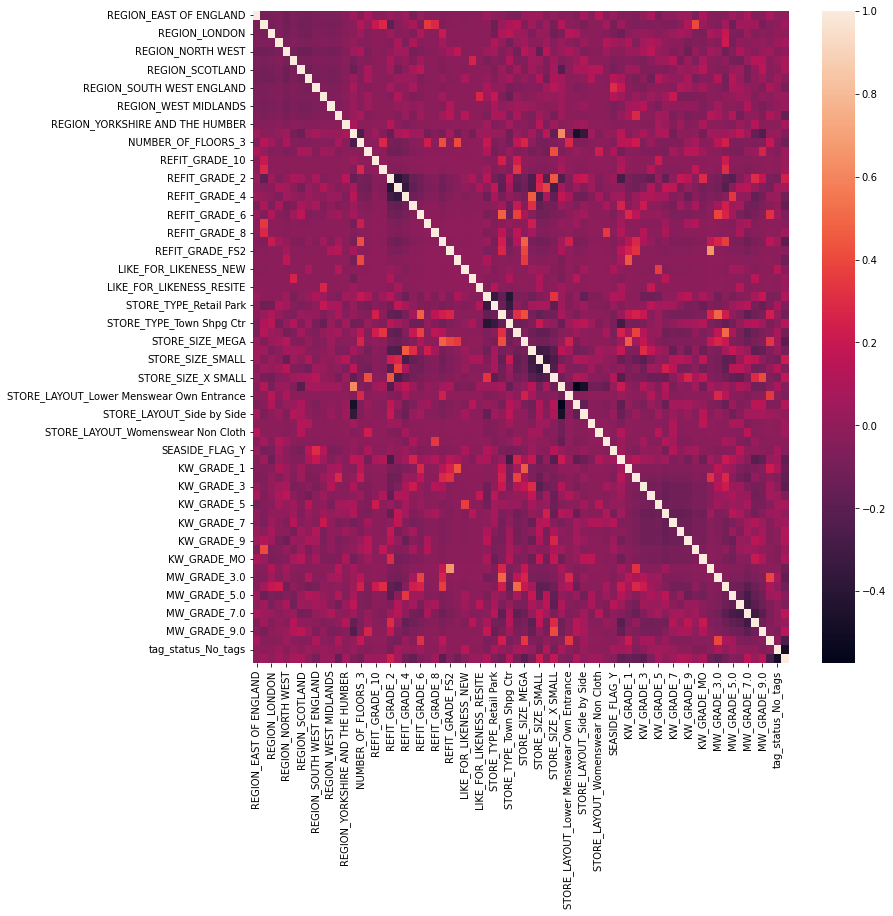

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_factors)

# Regression analysis

## Testing with simple 'statsmodels' first: with sales, predicting FP stockloss

In [51]:
import statsmodels.api as sm 
# Model building tool (1) simple regression model tool

from sklearn.linear_model import LinearRegression 
# Model building tool (2) more robust regression tool

from sklearn.model_selection import train_test_split 
# quick sampling method for separating training and testing data so the model can be evaluated
# on data it hasn't seen before

In [63]:
y = df['Cost_loss_fp']
X = df[['REGION_EAST OF ENGLAND', 'REGION_IRELAND',
'REGION_LONDON', 'REGION_NORTH EAST', 'REGION_NORTH WEST',
'REGION_NORTHERN IRELAND', 'REGION_SCOTLAND',
'REGION_SOUTH EAST ENGLAND', 'REGION_SOUTH WEST ENGLAND',
'REGION_WALES', 'REGION_WEST MIDLANDS', 'REGION_YORKSHIRE & THE HUMBER',
'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3','REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
'REFIT_GRADE_2', 'REFIT_GRADE_3',  'REFIT_GRADE_5',
'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_FS1',
'REFIT_GRADE_FS2', 'REFIT_GRADE_FS3','LIKE_FOR_LIKENESS_NEW',
'LIKE_FOR_LIKENESS_RESITE','STORE_TYPE_High Street',
'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
'STORE_TYPE_Town Shpg Ctr','STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
'STORE_SIZE_X SMALL', 'STORE_LAYOUT_First Floor Menswear',
'STORE_LAYOUT_Lower Menswear Own Entrance',
'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
'STORE_LAYOUT_Upper Menswear Own Entrance',
'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only','SEASIDE_FLAG_Y','UNI_FLAG_Y','KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
'KW_GRADE_BO', 'KW_GRADE_MO','MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
'MW_GRADE_9.0', 
'tag_status_No_tags', 'tag_status_Tagged',
'NO.INCIDENTS - PHYSICAL VIOLENCE',
'Unemployment',	'line_void_pc','Sales_value_tot']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [65]:
y_train.shape

(182,)

In [66]:
X_train.shape

(182, 71)

In [67]:
X_test.shape

(61, 71)

In [68]:
# create a copy of the training data set to use with this model 
xa1=X_train
# This needs to have a starting point 'constant' added
xa=sm.add_constant(xa1)

In [69]:
# Run the regression modelling (ordinary least squares = OLS)
results = sm.OLS(y_train,xa).fit()
# And print out a summary of the resulting model...
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cost_loss_fp   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     11.75
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           4.69e-29
Time:                        10:54:44   Log-Likelihood:                -1918.0
No. Observations:                 182   AIC:                             3980.
Df Residuals:                     110   BIC:                             4211.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     3.581e+04      3e+04      1.193      0.236   -2.37e+04    9.53e+04
REGION_EAST OF ENGLAND                    1460.2537   6611.530      0.221      0.826   -1.16e+04    1.46e+04
REGION_IRELAND                           -6051.7254   7889.665     -0.767      0.445   -2.17e+04    9583.739
REGION_LONDON                             4806.4260   7609.138      0.632      0.529   -1.03e+04    1.99e+04
REGION_NORTH EAST                        -1.805e+04   7129.101     -2.532      0.013   -3.22e+04   -3925.832
REGION_NORTH WEST                        -3905.9760   6385.070     -0.612      0.542   -1.66e+04    8747.734
REGION_NORTHERN IRELAND                  -1.134e+04   6938.135     -1.635      0.105   -2.51e+04    2405.838
REGION_SCOTLAND                          -1.329e+04   6985.726     -1.902      0.060   -2.71e+04     555.735
REGION_SOUTH EAST ENGLAND                 6805.1151   6211.631      1.096      0.276   -5504.879    1.91e+04
REGION_SOUTH WEST ENGLAND                 -436.0194   7022.784     -0.062      0.951   -1.44e+04    1.35e+04
REGION_WALES                             -4846.9530   6874.095     -0.705      0.482   -1.85e+04    8775.890
REGION_WEST MIDLANDS                       609.8324   6696.623      0.091      0.928   -1.27e+04    1.39e+04
REGION_YORKSHIRE & THE HUMBER            -8762.4632   8031.248     -1.091      0.278   -2.47e+04    7153.585
NUMBER_OF_FLOORS_2                       -3731.3197   4575.419     -0.816      0.417   -1.28e+04    5336.087
NUMBER_OF_FLOORS_3                       -1.592e+04   1.38e+04     -1.155      0.251   -4.32e+04    1.14e+04
REFIT_GRADE_1                            -1.152e+04   6627.170     -1.738      0.085   -2.47e+04    1614.954
REFIT_GRADE_10                            6261.7731   2.03e+04      0.308      0.758    -3.4e+04    4.65e+04
REFIT_GRADE_11                             3.29e+04   1.83e+04      1.799      0.075   -3350.712    6.91e+04
REFIT_GRADE_2                            -8214.1392   4418.476     -1.859      0.066    -1.7e+04     542.243
REFIT_GRADE_3                            -6259.4776   3748.277     -1.670      0.098   -1.37e+04    1168.727
REFIT_GRADE_5                            -1.088e+04   6365.368     -1.709      0.090   -2.35e+04    1733.201
REFIT_GRADE_6                            -2.091e+04   1.17e+04     -1.792      0.076    -4.4e+04    2218.435
REFIT_GRADE_7                               1.5e+04   1.24e+04      1.210      0.229   -9571.794    3.96e+04
REFIT_GRADE_FS1                           1.095e+04   1.39e+04      0.791      0.431   -1.65e+04    3.84e+04
REFIT_GRADE_FS2                          -1.258e+04   2.78e+04     -0.452      0.652   -6.77e+04    4.25e+04
REFIT_GRADE_FS3                

## Repeat using SKLearn: (1) with sales, predicting FP stockloss

In [70]:
# Create an instance of LinearRegression() and call it lm
lm = LinearRegression()

In [71]:
y = df['Cost_loss_fp']
X = df[['REGION_EAST OF ENGLAND', 'REGION_IRELAND',
'REGION_LONDON', 'REGION_NORTH EAST', 'REGION_NORTH WEST',
'REGION_NORTHERN IRELAND', 'REGION_SCOTLAND',
'REGION_SOUTH EAST ENGLAND', 'REGION_SOUTH WEST ENGLAND',
'REGION_WALES', 'REGION_WEST MIDLANDS', 'REGION_YORKSHIRE & THE HUMBER',
'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3','REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
'REFIT_GRADE_2', 'REFIT_GRADE_3',  'REFIT_GRADE_5',
'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_FS1',
'REFIT_GRADE_FS2', 'REFIT_GRADE_FS3','LIKE_FOR_LIKENESS_NEW',
'LIKE_FOR_LIKENESS_RESITE','STORE_TYPE_High Street',
'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
'STORE_TYPE_Town Shpg Ctr','STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
'STORE_SIZE_X SMALL', 'STORE_LAYOUT_First Floor Menswear',
'STORE_LAYOUT_Lower Menswear Own Entrance',
'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
'STORE_LAYOUT_Upper Menswear Own Entrance',
'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only','SEASIDE_FLAG_Y','UNI_FLAG_Y','KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
'KW_GRADE_BO', 'KW_GRADE_MO','MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
'MW_GRADE_9.0', 
'tag_status_No_tags', 'tag_status_Tagged',
'NO.INCIDENTS - PHYSICAL VIOLENCE',
'Unemployment',	'line_void_pc','Sales_value_tot']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
# Train the model on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [83]:
lm.intercept_

4905.974170108122

In [75]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
REGION_EAST OF ENGLAND,785.408864
REGION_IRELAND,-10372.612039
REGION_LONDON,3055.397801
REGION_NORTH EAST,-18957.596092
REGION_NORTH WEST,-3601.013285
...,...
tag_status_Tagged,-2030.694198
NO.INCIDENTS - PHYSICAL VIOLENCE,332.486600
Unemployment,2.506224
line_void_pc,277920.190803


In [82]:
coeffecients.to_csv("Coefficients_out.csv")

In [91]:
df_check = df[df['STORE_NUMBER']==2] 

In [92]:
df_check_features = df_check[['REGION_EAST OF ENGLAND', 'REGION_IRELAND',
'REGION_LONDON', 'REGION_NORTH EAST', 'REGION_NORTH WEST',
'REGION_NORTHERN IRELAND', 'REGION_SCOTLAND',
'REGION_SOUTH EAST ENGLAND', 'REGION_SOUTH WEST ENGLAND',
'REGION_WALES', 'REGION_WEST MIDLANDS', 'REGION_YORKSHIRE & THE HUMBER',
'NUMBER_OF_FLOORS_2', 'NUMBER_OF_FLOORS_3','REFIT_GRADE_1', 'REFIT_GRADE_10', 'REFIT_GRADE_11',
'REFIT_GRADE_2', 'REFIT_GRADE_3',  'REFIT_GRADE_5',
'REFIT_GRADE_6', 'REFIT_GRADE_7', 'REFIT_GRADE_FS1',
'REFIT_GRADE_FS2', 'REFIT_GRADE_FS3','LIKE_FOR_LIKENESS_NEW',
'LIKE_FOR_LIKENESS_RESITE','STORE_TYPE_High Street',
'STORE_TYPE_Retail Park', 'STORE_TYPE_Rgnl Shpg Ctr',
'STORE_TYPE_Town Shpg Ctr','STORE_SIZE_LARGE', 'STORE_SIZE_MEGA',
'STORE_SIZE_MID', 'STORE_SIZE_SMALL', 'STORE_SIZE_STANDARD',
'STORE_SIZE_X SMALL', 'STORE_LAYOUT_First Floor Menswear',
'STORE_LAYOUT_Lower Menswear Own Entrance',
'STORE_LAYOUT_Rear of Shop Menswear', 'STORE_LAYOUT_Side by Side',
'STORE_LAYOUT_Upper Menswear Own Entrance',
'STORE_LAYOUT_Womenswear Non Cloth', 'STORE_LAYOUT_Womenswear Only','SEASIDE_FLAG_Y','UNI_FLAG_Y','KW_GRADE_1', 'KW_GRADE_2', 'KW_GRADE_3', 'KW_GRADE_4',
'KW_GRADE_5', 'KW_GRADE_6', 'KW_GRADE_7', 'KW_GRADE_8', 'KW_GRADE_9',
'KW_GRADE_BO', 'KW_GRADE_MO','MW_GRADE_2.0', 'MW_GRADE_3.0', 'MW_GRADE_4.0',
'MW_GRADE_5.0', 'MW_GRADE_6.0', 'MW_GRADE_7.0', 'MW_GRADE_8.0',
'MW_GRADE_9.0', 
'tag_status_No_tags', 'tag_status_Tagged',
'NO.INCIDENTS - PHYSICAL VIOLENCE',
'Unemployment',	'line_void_pc','Sales_value_tot']]

In [76]:
predictions = lm.predict(X_test)

In [93]:
lm.predict(df_check_features)

array([73930.79421381])

Text(0, 0.5, 'Predicted Y')

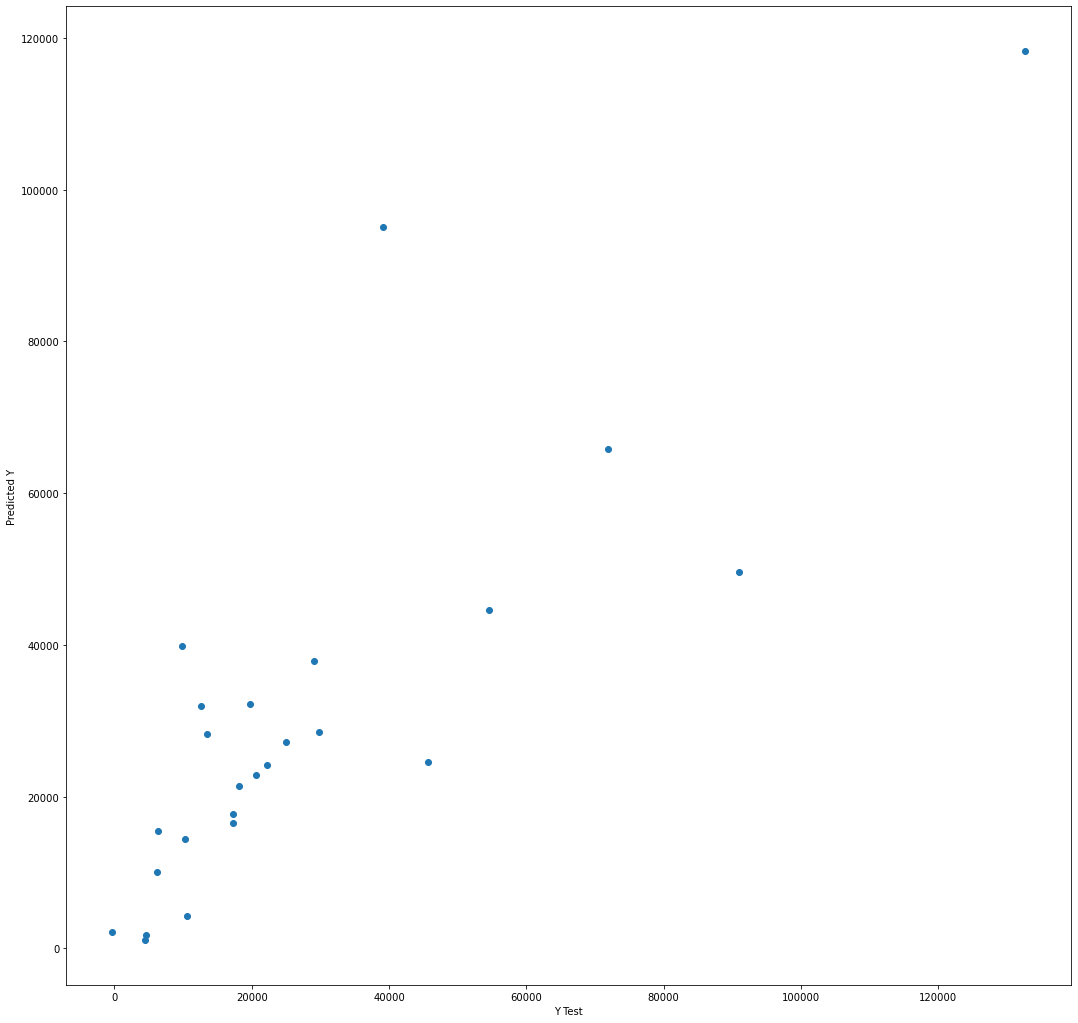

In [77]:
plt.rcParams["figure.figsize"] = (18,18)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [78]:
from sklearn import metrics

print('Mean Absolute Error:    ', '{:.3f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Mean Squard Error:      ', '{:.3f}'.format(metrics.mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error:', '{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('r-squared:              ', '{:.3f}'.format(metrics.r2_score (y_test, predictions)))
print('Explained variance      ', '{:.3f}'.format(metrics.explained_variance_score(y_test, predictions)))

Mean Absolute Error:     11142.301
Mean Squard Error:       303185777.763
Root Mean Squared Error: 17412.231
r-squared:               0.667
Explained variance       0.674


In [79]:
predictions2 = lm.predict(X)

Text(0, 0.5, 'Predicted Y')

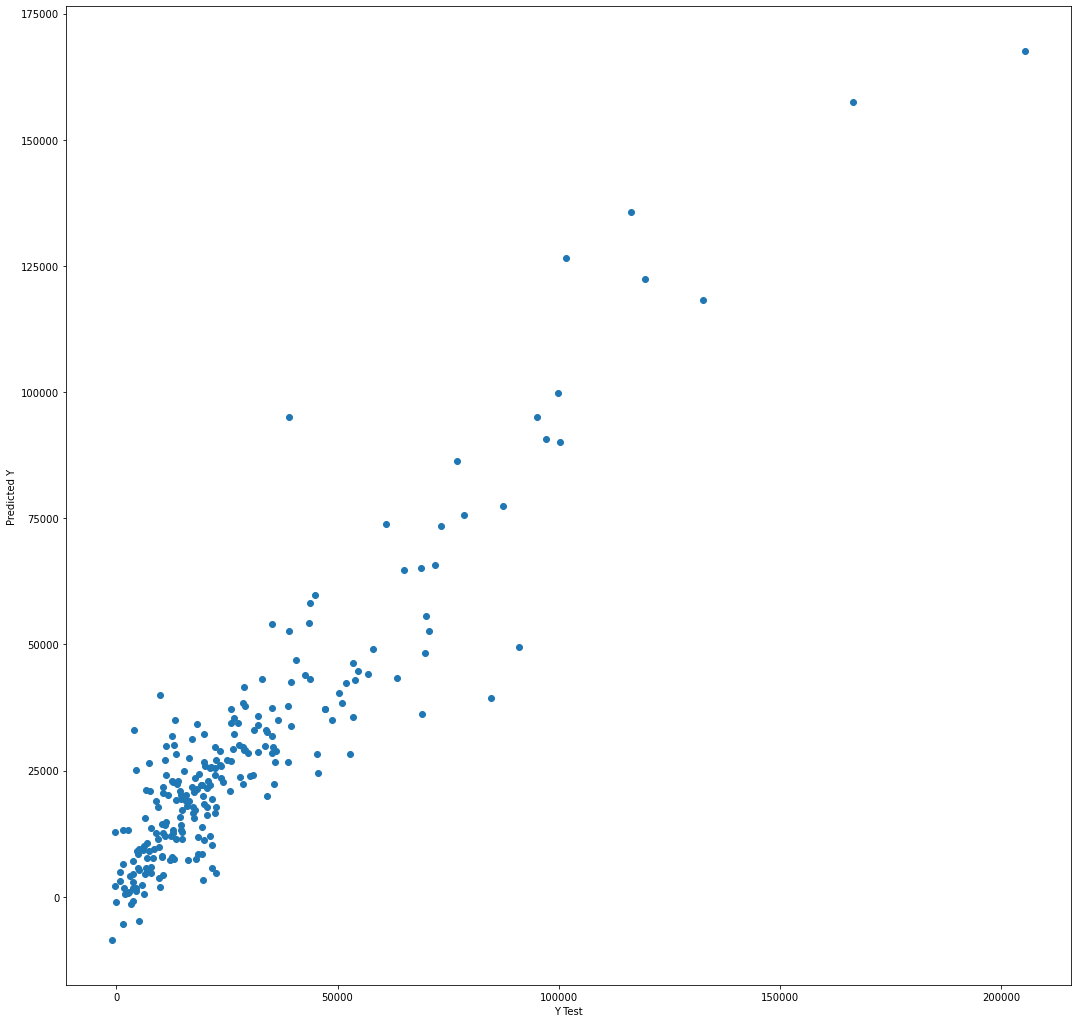

In [80]:
plt.rcParams["figure.figsize"] = (18,18)
plt.scatter(y,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [374]:
print('Mean Absolute Error:    ', '{:.3f}'.format(metrics.mean_absolute_error(y, predictions2)))
print('Mean Squard Error:      ', '{:.3f}'.format(metrics.mean_squared_error(y, predictions2)))
print('Root Mean Squared Error:', '{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, predictions2))))
print('r-squared:              ', '{:.3f}'.format(metrics.r2_score (y, predictions2)))
print('Explained variance      ', '{:.3f}'.format(metrics.explained_variance_score(y, predictions2)))

Mean Absolute Error:     9202.781
Mean Squard Error:       170655700.829
Root Mean Squared Error: 13063.526
r-squared:               0.782
Explained variance       0.783
